https://www.zhihu.com/question/20962240

## 有三个色子，分别有4，6，8个面

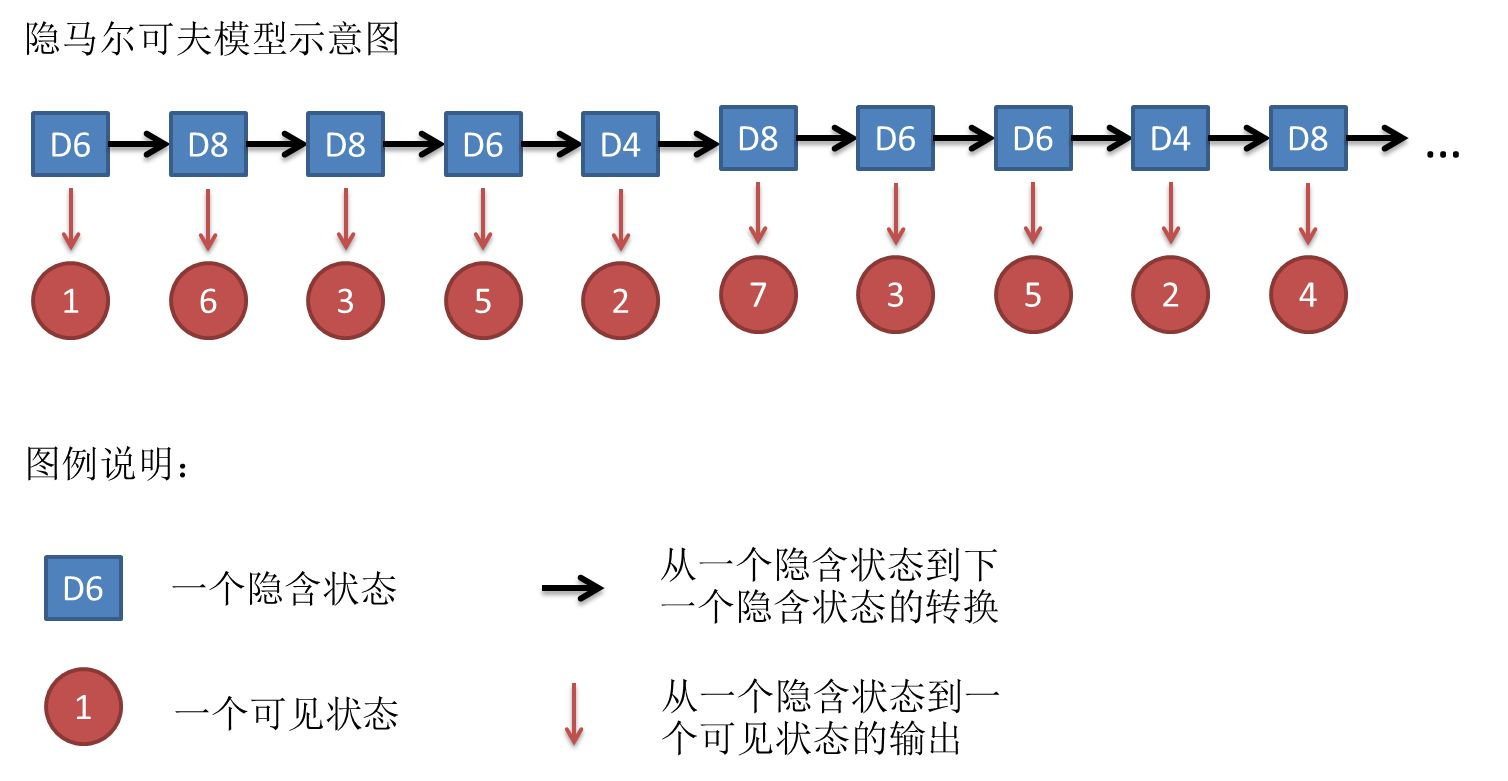

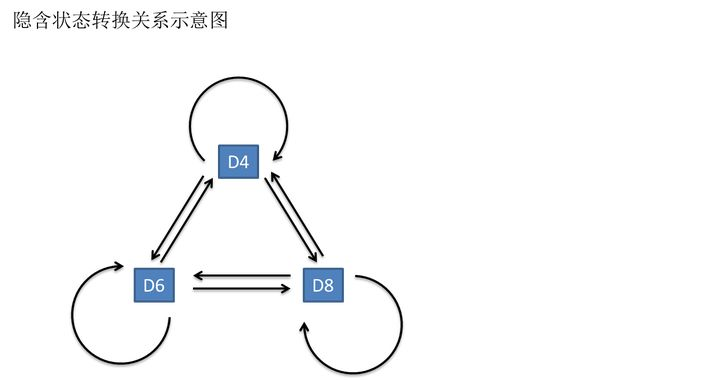

- 知道骰子有几种（隐含状态数量），每种骰子是什么（转换概率），根据掷骰子掷出的结果（可见状态链），我想知道每次掷出来的都是哪种骰子（隐含状态链）。预测算法
- 还是知道骰子有几种（隐含状态数量），每种骰子是什么（转换概率），根据掷骰子掷出的结果（可见状态链），我想知道掷出这个结果的概率。估计算法
- 知道骰子有几种（隐含状态数量），不知道每种骰子是什么（转换概率），观测到很多次掷骰子的结果（可见状态链），我想反推出每种骰子是什么（转换概率）。学习算法

In [74]:
np.random.rand()

0.10165999910911927

In [1]:
#现在打算有4个盒子（隐含），首先等概率选择第一个盒子，抽红白球，转换概率到下一个盒子

import numpy as np

# 根据给定的概率分布随机返回数据
#这个函数只生成一个数，在0，1，2，3中间选一个，按照p的分布概率选择落入的区间，确定数字，比如初始的，如果r随机为0.7，就选第三个
def get_data_with_distribution(dist):  # dist是状态概率向量，即选盒子的各个概率，初始的是4个0.25
    r = np.random.rand() #“0~1”均匀分布的随机样本值，如0.1
    for i, p in enumerate(dist): # i是1，2，3，4
        if r < p: #如果0.1<0.25，
            return i #返回0.25
        r -= p #如果r=0.8，r-0.25
        
def generate(T):
    '''
    根据给定的参数生成观测序列
    T: 指定要生成数据的数量
    '''
    # 根据初始概率分布生成第一个状态
    z = get_data_with_distribution(pi) #0，1，2，3
    # 生成第一个观测数据
    x = get_data_with_distribution(B[z])  #选中了第z个球
    result = [x] # 结果是红球还是白球
    # 遍历生成余下的状态和观测数据
    for _ in range(T-1):        
        z = get_data_with_distribution(A[z]) #从第z个球往下个球转移
        x = get_data_with_distribution(B[z])
        result.append(x)
    return result

### 盒子和球相关的模型参数
# 初始状态概率向量
pi = np.array([0.25, 0.25, 0.25, 0.25])

# 状态转移概率矩阵
A = np.array([
    [0,  1,  0, 0],
    [.4, 0, .6, 0],
    [0, .4, 0, .6],
    [0, 0, .5, .5]])

# 观测概率矩阵 #每个盒子摸红白球的概率
B = np.array([
    [0.5, 0.5],
    [0.3, 0.7],
    [0.6, 0.4],
    [0.8, 0.2]])

# 生成10个数据
generate(10)

[0, 1, 0, 1, 1, 0, 1, 1, 1, 0]

In [2]:
def viterbi_decode(X):
    T, x = len(X), X[0]
    # 初始化
    delta = pi * B[:,x]
    varphi = np.zeros((T, N), dtype=int)
    path = [0] * T
    # 递推
    for i in range(1, T):
        delta = delta.reshape(-1,1)     
        tmp = delta * A
        varphi[i,:] = np.argmax(tmp, axis=0)
        delta = np.max(tmp, axis=0) * B[:,X[i]]
    # 终止
    path[-1] = np.argmax(delta)
    # 最优路径回溯
    for i in range(T-1,0,-1):
        path[i-1] = varphi[i,path[i]]
    return path

X = [1,0,1,0,0] #出现的红白球结果
N = 4
print(viterbi_decode(X)) #预测每次是哪个盒子，A和B都用了，如果是为了预测A就是学习算法

[1, 0, 1, 2, 3]
